In [ ]:
!pip install plotly
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency, f_oneway
from sklearn.feature_selection import RFE, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import plotly.express as px

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving employee_attrition_dataset_10000.csv to employee_attrition_dataset_10000 (2).csv


In [ ]:
import pandas as pd

# Load the uploaded CSV
# Corrected file name (remove leading space)
data = pd.read_csv('employee_attrition_dataset_10000.csv')


# View the first few rows
data.head()


,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Male,Single,Finance,Manager,5,7332,81,24,...,No,9,48,16,4,1,1,49,3,No
1,2,48,Female,Divorced,HR,Assistant,4,6069,55,18,...,Yes,9,57,10,4,1,1,25,1,No
2,3,34,Female,Married,Marketing,Manager,4,11485,65,6,...,Yes,3,55,1,1,4,3,21,1,Yes
3,4,27,Female,Divorced,HR,Manager,4,18707,28,12,...,No,9,53,2,3,4,1,46,2,No
4,5,40,Male,Married,HR,Analyst,1,16398,92,3,...,No,1,54,11,1,1,1,43,4,No


In [ ]:
data.head()

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Male,Single,Finance,Manager,5,7332,81,24,...,No,9,48,16,4,1,1,49,3,No
1,2,48,Female,Divorced,HR,Assistant,4,6069,55,18,...,Yes,9,57,10,4,1,1,25,1,No
2,3,34,Female,Married,Marketing,Manager,4,11485,65,6,...,Yes,3,55,1,1,4,3,21,1,Yes
3,4,27,Female,Divorced,HR,Manager,4,18707,28,12,...,No,9,53,2,3,4,1,46,2,No
4,5,40,Male,Married,HR,Analyst,1,16398,92,3,...,No,1,54,11,1,1,1,43,4,No


In [ ]:
data.shape

(10000, 26)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    10000 non-null  int64 
 1   Age                            10000 non-null  int64 
 2   Gender                         10000 non-null  object
 3   Marital_Status                 10000 non-null  object
 4   Department                     10000 non-null  object
 5   Job_Role                       10000 non-null  object
 6   Job_Level                      10000 non-null  int64 
 7   Monthly_Income                 10000 non-null  int64 
 8   Hourly_Rate                    10000 non-null  int64 
 9   Years_at_Company               10000 non-null  int64 
 10  Years_in_Current_Role          10000 non-null  int64 
 11  Years_Since_Last_Promotion     10000 non-null  int64 
 12  Work_Life_Balance              10000 non-null  int64 
 13  Jo

In [ ]:
data.duplicated().value_counts()

,count
False,10000


In [ ]:
duplicate_ids = data[data['Employee_ID'].duplicated()]
duplicate_ids.shape[0]

0

In [ ]:
data.isnull().sum()

,0
Employee_ID,0
Age,0
Gender,0
Marital_Status,0
Department,0
Job_Role,0
Job_Level,0
Monthly_Income,0
Hourly_Rate,0
Years_at_Company,0


In [ ]:
data.describe()

,Employee_ID,Age,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,39.561800,2.990800,11436.716700,57.032300,14.936200,7.451300,4.471900,2.502400,3.038000,2.507700,49.588900,4.984400,44.473500,9.410200,2.493100,2.491400,2.505400,25.272000,2.516600
std,2886.89568,11.454986,1.410643,4926.528302,24.703261,8.431657,4.042903,2.891617,1.112348,1.414764,1.120833,28.801393,2.580043,8.611662,5.760335,1.120927,1.115101,1.116018,14.219474,1.113934
min,1.00000,20.000000,1.000000,3000.000000,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,30.000000,2.000000,7182.500000,36.000000,8.000000,4.000000,2.000000,2.000000,2.000000,2.000000,25.000000,3.000000,37.000000,4.000000,1.000000,1.000000,2.000000,13.000000,2.000000
50%,5000.50000,40.000000,3.000000,11401.500000,57.000000,15.000000,7.000000,4.000000,2.000000,3.000000,3.000000,49.000000,5.000000,45.000000,9.000000,2.000000,2.000000,3.000000,25.000000,2.000000
75%,7500.25000,49.000000,4.000000,15679.500000,78.000000,22.000000,11.000000,7.000000,3.000000,4.000000,4.000000,75.000000,7.000000,52.000000,14.000000,4.000000,3.000000,3.000000,37.000000,4.000000
max,10000.00000,59.000000,5.000000,19999.000000,99.000000,29.000000,14.000000,9.000000,4.000000,5.000000,4.000000,99.000000,9.000000,59.000000,19.000000,4.000000,4.000000,4.000000,49.000000,4.000000


In [ ]:
data.drop(columns=["Employee_ID"], inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Encode categorical columns

In [ ]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# Then apply Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le



# Normalize numerical features

In [ ]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

if 'Attrition' in numerical_cols:
    numerical_cols.remove('Attrition')  # only remove if it's actually in the list

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


# create new interaction features

In [ ]:
data['Salary_Performance_Ratio'] = data['Monthly_Income'] / (data['Performance_Rating'] + 1)

data['Salary_Performance_Ratio'] = scaler.fit_transform(data[['Salary_Performance_Ratio']])



In [ ]:
# Convert categorical Tenure_Group to numeric
data['Tenure_Group'] = pd.cut(data['Years_at_Company'] * 29, bins=[0, 5, 10, 20, 30], labels=[0, 1, 2, 3])  # 29 is max
data['Tenure_Group'] = data['Tenure_Group'].cat.add_categories([-1]).fillna(-1).astype(int)

In [ ]:
data.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,...,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition,Salary_Performance_Ratio,Tenure_Group
0,0.974359,1.0,1.0,0.00,1.000000,1.00,0.254839,0.785714,0.821429,0.846154,...,0.620690,0.842105,1.000000,0.0,0.000000,1.000000,0.666667,0,0.191129,3
1,0.717949,0.0,0.0,0.25,0.333333,0.75,0.180540,0.476190,0.607143,0.461538,...,0.931034,0.526316,1.000000,0.0,0.000000,0.500000,0.000000,0,0.135405,2
2,0.358974,0.0,0.5,0.75,1.000000,0.75,0.499147,0.595238,0.178571,0.230769,...,0.862069,0.052632,0.000000,1.0,0.666667,0.416667,0.000000,1,0.499147,1
3,0.179487,0.0,0.0,0.25,1.000000,0.75,0.923996,0.154762,0.392857,0.615385,...,0.793103,0.105263,0.666667,1.0,0.000000,0.937500,0.333333,0,0.692997,2
4,0.512821,1.0,0.5,0.25,0.000000,0.00,0.788164,0.916667,0.071429,0.615385,...,0.827586,0.578947,0.000000,0.0,0.000000,0.875000,1.000000,0,0.472898,0


In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

Attrition distribution

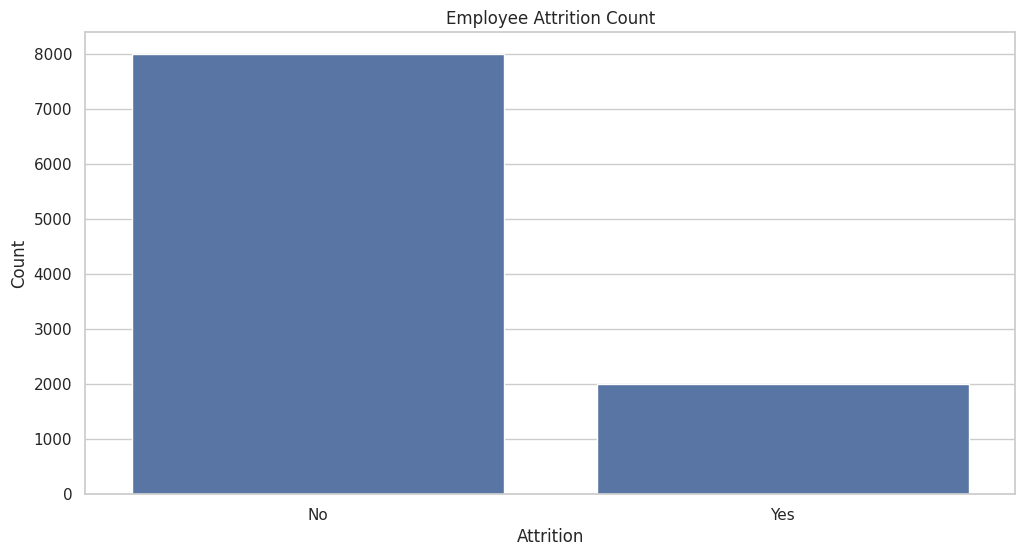

In [ ]:
plt.figure()
sns.countplot(data=data, x='Attrition')
plt.title("Employee Attrition Count")
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

Attrition by Job Role

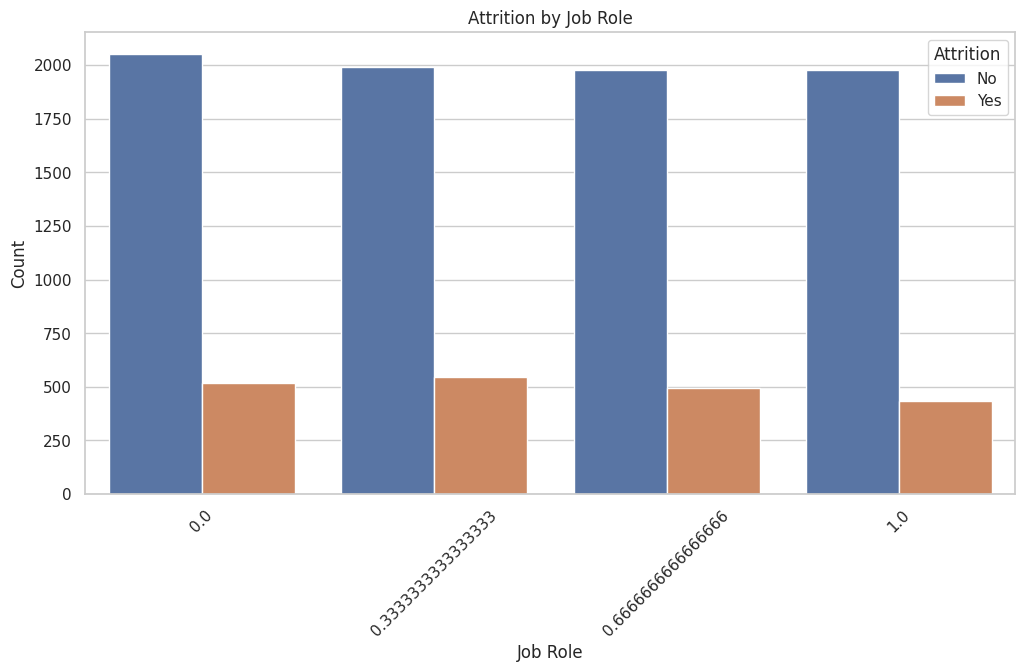

In [ ]:
plt.figure()
sns.countplot(data=data, x='Job_Role', hue='Attrition')
plt.title("Attrition by Job Role")
plt.xlabel("Job Role")
plt.ylabel("Count")
plt.legend(title="Attrition", labels=["No", "Yes"])
plt.xticks(rotation=45)
plt.show()

Monthly Income distribution by Attrition

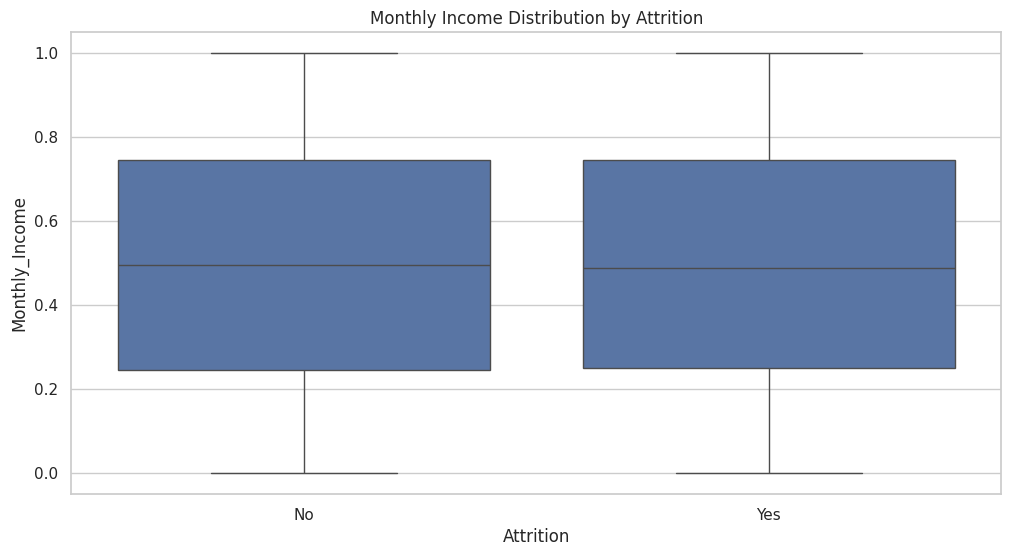

In [ ]:
plt.figure()
sns.boxplot(data=data, x='Attrition', y='Monthly_Income')
plt.title("Monthly Income Distribution by Attrition")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Correlation heatmap

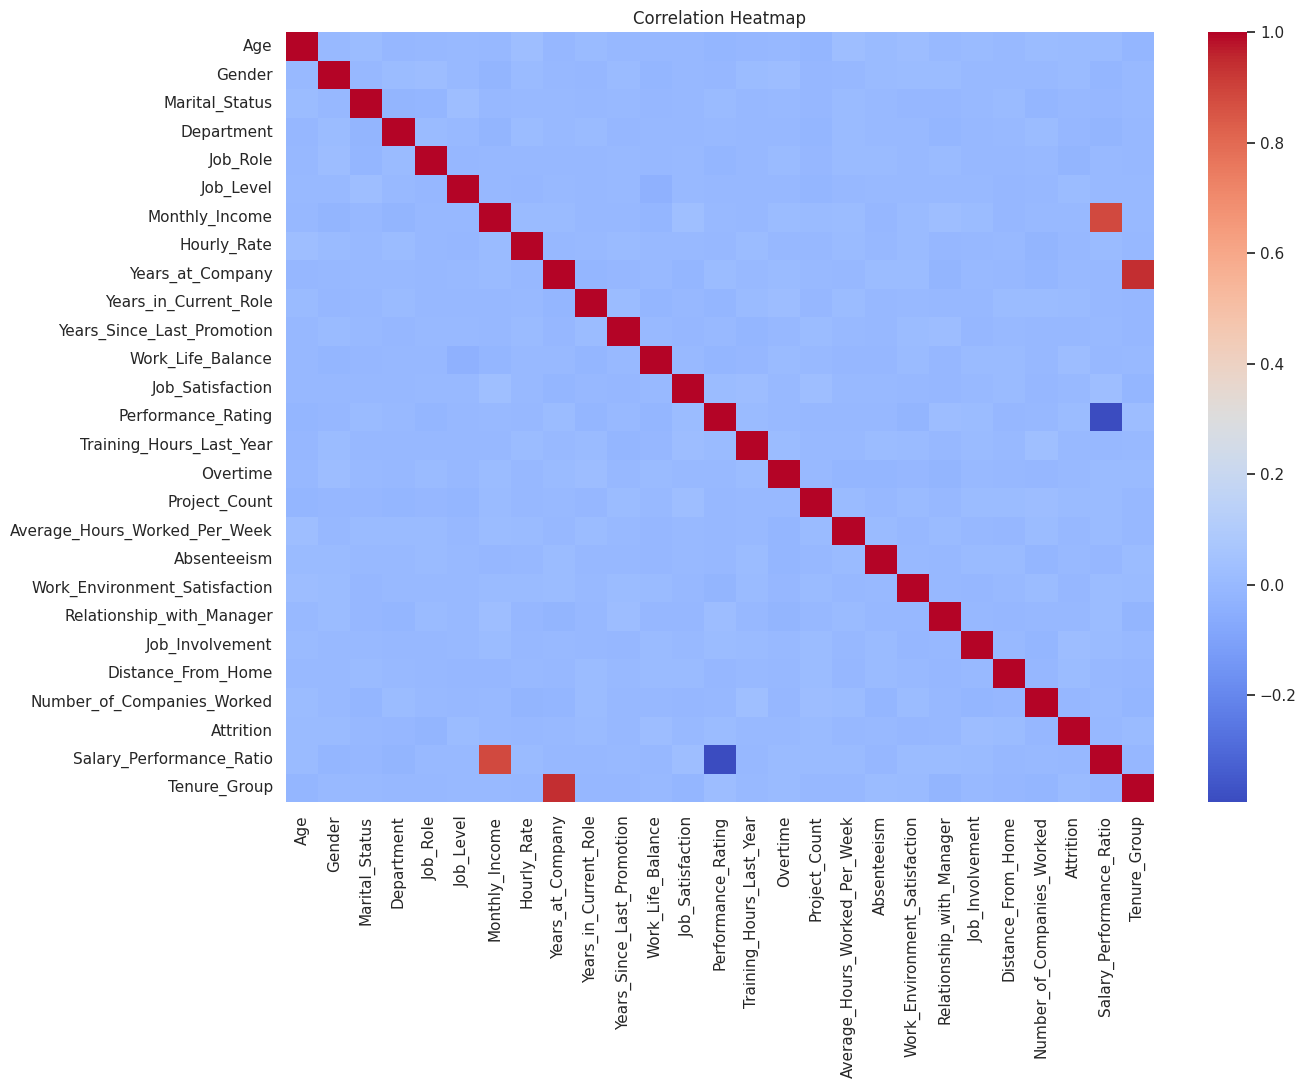

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


Attrition by Tenure Group

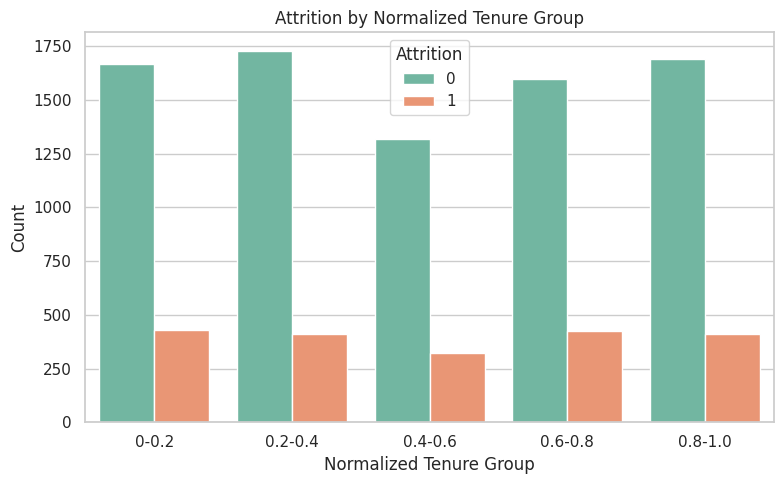

In [ ]:
# Define bins for normalized values (0 to 1)
bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.01]  # 1.01 to ensure inclusion of 1.0
labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']

# Create groups
data['Tenure_Group'] = pd.cut(data['Years_at_Company'], bins=bins, labels=labels, right=False)

# Plotting
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Tenure_Group', hue='Attrition', palette='Set2')
plt.title("Attrition by Normalized Tenure Group")
plt.xlabel("Normalized Tenure Group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



In [ ]:
import plotly.express as px

fig = px.box(
    data_frame=data,
    x='Attrition',
    y='Monthly_Income',
    color='Attrition',
    title='Monthly Income vs Attrition (Interactive)'
)
fig.show()


In [ ]:

data['Years_at_Company_Actual'] = data['Years_at_Company'] * 40  # assuming 40 is max original value


def categorize_tenure(years):
    if years < 3:
        return 'Short-Term'
    elif 3 <= years <= 6:
        return 'Medium-Term'
    else:
        return 'Long-Term'


data['Tenure_Group'] = data['Years_at_Company_Actual'].apply(categorize_tenure)

print(data['Tenure_Group'].value_counts())

Tenure_Group
Long-Term      8247
Short-Term     1035
Medium-Term     718
Name: count, dtype: int64


In [ ]:
import plotly.express as px

fig = px.bar(
    data_frame=data,
    x='Tenure_Group',
    color='Attrition',
    title='Attrition Rate by Tenure Group',
    labels={'Tenure_Group': 'Tenure Group', 'Attrition': 'Attrition Status'},
    color_discrete_map={'Yes': 'red', 'No': 'green'},
    barmode='stack'
)

fig.update_layout(
    xaxis_title='Tenure Group',
    yaxis_title='Count',
    xaxis_tickangle=-45,
    showlegend=True
)

fig.show()

In [ ]:
from scipy.stats import ttest_ind
import pandas as pd

filtered_data = data[['Attrition', 'Monthly_Income']].dropna()

group1 = filtered_data[filtered_data['Attrition'] == 'Yes']['Monthly_Income']
group2 = filtered_data[filtered_data['Attrition'] == 'No']['Monthly_Income']


result = ttest_ind(group1, group2, equal_var=False)  # Welch's t-test (safer when variances differ)

print("T-test result:")
print("Statistic:", result.statistic)
print("P-value:", result.pvalue)

# Interpretation
if result.pvalue < 0.05:
    print(" Significant difference in Monthly Income between attrition and non-attrition groups.")
else:
    print(" No significant difference in Monthly Income between groups (same salary on average).")



T-test result:
Statistic: nan
P-value: nan
 No significant difference in Monthly Income between groups (same salary on average).


/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning:

One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.



In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Assuming your DataFrame is named 'data' and columns are 'Job_Role' and 'Attrition'
# First, ensure no missing values in the columns used
contingency = pd.crosstab(data['Job_Role'], data['Attrition'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency)

# Output results
print(f"Chi-squared test:\nChi2 Statistic = {chi2:.4f}\nDegrees of Freedom = {dof}\nP-value = {p:.4f}")

# Interpretation
if p < 0.05:
    print(" Significant relationship between Job Role and Attrition.")
else:
    print(" No significant relationship between Job Role and Attrition.")


Chi-squared test:
Chi2 Statistic = 9.0224
Degrees of Freedom = 3
P-value = 0.0290
 Significant relationship between Job Role and Attrition.


In [ ]:
from scipy.stats import f_oneway

# Group Performance Rating by Job Role
groups = [group['Performance_Rating'].dropna().values for _, group in data.groupby('Job_Role')]

# Perform one-way ANOVA
f_stat, p_val = f_oneway(*groups)

# Print results
print(f"ANOVA: F-statistic = {f_stat:.4f}, p-value = {p_val:.4f}")

# Interpretation
if p_val < 0.05:
    print(" Significant difference in Performance Rating across Job Roles.")
else:
    print("No significant difference in Performance Rating across Job Roles.")


ANOVA: F-statistic = 1.6237, p-value = 0.1816
No significant difference in Performance Rating across Job Roles.


In [ ]:
def categorize_tenure(years):
    if years < 3:
        return 'Short-term'
    elif years <= 7:
        return 'Medium-term'
    else:
        return 'Long-term'

# Apply function to create new column
data['TenureCategory'] = data['Years_at_Company'].apply(categorize_tenure)



In [ ]:
data['SalaryBand'] = pd.qcut(data['Monthly_Income'], q=3, labels=['Low', 'Medium', 'High'])


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the specified columns
data[['Monthly_Income', 'Years_at_Company']] = scaler.fit_transform(data[['Monthly_Income', 'Years_at_Company']])


In [ ]:
data = pd.get_dummies(data, columns=['Job_Role', 'Department', 'TenureCategory', 'SalaryBand'], drop_first=True)



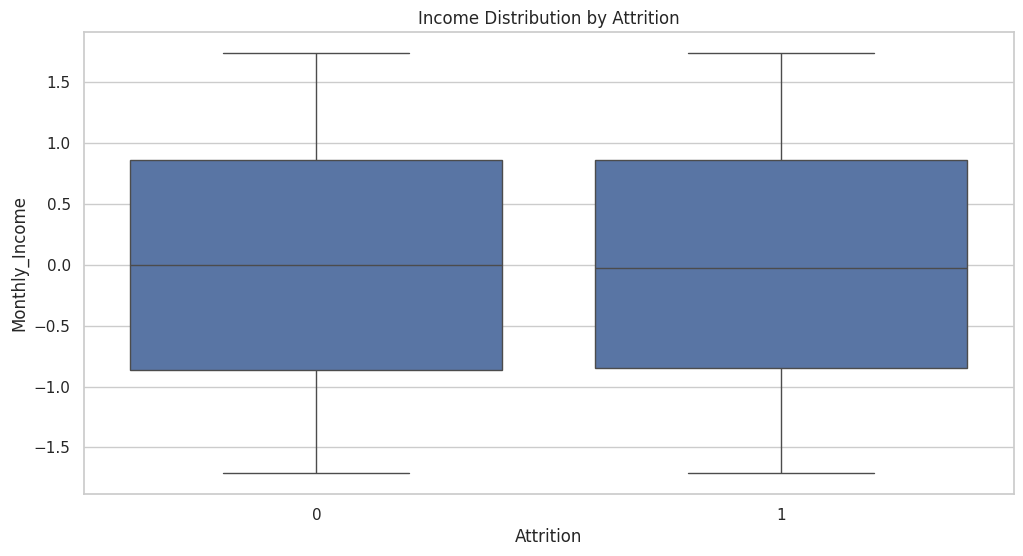

In [ ]:
sns.boxplot(x='Attrition', y='Monthly_Income', data=data)
plt.title('Income Distribution by Attrition')
plt.show()



In [ ]:
import plotly.express as px

# Create an interactive box plot
fig = px.box(data, x='Attrition', y='Monthly_Income', color='Attrition',
             title='Interactive Income Distribution by Attrition')

# Show the plot
fig.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import numpy as np

# Load your dataset (replace with actual file path if needed)
df = pd.read_csv('employee_attrition_dataset_10000.csv')

# Convert 'Attrition' to numeric (1 for 'Yes', 0 for 'No')
y = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select only numeric columns for feature selection (excluding 'Employee_ID' or similar ID columns)
X_numeric = df.select_dtypes(include=[np.number]).drop(columns=['Employee_ID'])  # Drop 'Employee_ID' if it exists

# Create the logistic regression model
model = LogisticRegression(max_iter=1000)  # or try max_iter=2000 if needed

# Perform RFE to select the top 10 features
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_numeric, y)

# Get the selected features
selected_features = X_numeric.columns[rfe.support_]
print("Top features from RFE:", selected_features.tolist())



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Top features from RFE: ['Job_Level', 'Years_in_Current_Role', 'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating', 'Project_Count', 'Work_Environment_Satisfaction', 'Relationship_with_Manager', 'Job_Involvement', 'Number_of_Companies_Worked']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Select relevant features (replace 'Salary' with 'Monthly_Income')
X = data[['Monthly_Income', 'Age', 'Years_at_Company']]
y = data['Attrition']

# Encode target variable (Attrition: Yes/No → 1/0)
le = LabelEncoder()
y = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.80


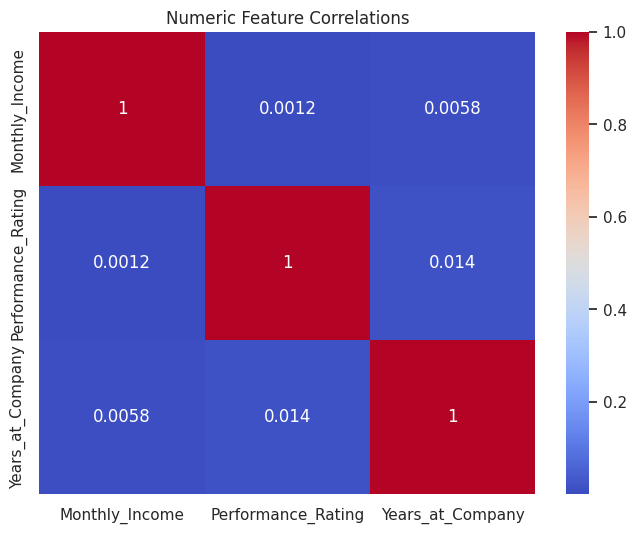

In [ ]:
# Heatmap of correlations (numeric only)
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Monthly_Income', 'Performance_Rating', 'Years_at_Company']].corr(),
            cmap='coolwarm', annot=True)
plt.title("Numeric Feature Correlations")
plt.show()


In [ ]:
!pip install dash

In [ ]:
import dash
from dash import dcc, html
import plotly.express as px


In [ ]:
# Save this as app.py and run with: python app.py

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Load your data
data = pd.read_csv("employee_attrition_dataset_10000.csv")  # Replace with the correct path to your CSV

# Corrected column name for salary (use Monthly_Income or whatever exists in your data)
salary_col = 'Monthly_Income'  # Ensure this exists in your data

# Initialize the Dash app
app = dash.Dash(__name__)
server = app.server  # for deployment if needed

# Bar chart: Attrition by Job Role
fig1 = px.histogram(
    data, x='Job_Role', color='Attrition', barmode='group',
    title="Attrition by Job Role"
)

# Box plot: Salary by Attrition
fig2 = px.box(
    data, x='Attrition', y=salary_col,
    title="Salary by Attrition", points="all"
)

# Layout
app.layout = html.Div([
    html.H1("Employee Attrition Dashboard"),

    dcc.Dropdown(
        id='role-filter',
        options=[{'label': role, 'value': role} for role in sorted(data['Job_Role'].unique())],
        placeholder="Filter by Job Role",
        style={'width': '50%', 'margin-bottom': '20px'}
    ),

    dcc.Graph(id='bar-role', figure=fig1),
    dcc.Graph(id='box-salary', figure=fig2)
])

# Callback to update bar chart based on dropdown
@app.callback(
    Output('bar-role', 'figure'),
    Input('role-filter', 'value')
)
def update_bar(selected_role):
    if selected_role is None:
        # All job roles shown
        fig = px.histogram(
            data, x='Job_Role', color='Attrition',
            barmode='group', title="Attrition by Job Role"
        )
    else:
        # Only selected role shown
        filtered_data = data[data['Job_Role'] == selected_role]
        fig = px.histogram(
            filtered_data, x='Attrition', color='Attrition',
            title=f"Attrition Count for {selected_role}"
        )
    return fig

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
# Check if 'Employee_ID' exists in the DataFrame columns
if 'Employee_ID' in data.columns:
    X_numeric = data.select_dtypes(include=[np.number]).drop(columns=['Employee_ID'])  # Drop ID column if present

# Ensure 'Attrition' is binary and encode it correctly
y = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Attrition'])  # Adjust if the target column is named differently
y = data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Separate target and features
X = data.drop(columns=['Attrition'])
y = data['Attrition']

# Convert 'Attrition' to binary labels (1 for 'Yes', 0 for 'No')
y = y.apply(lambda x: 1 if x == 'Yes' else 0)

# Define categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
            ('scaler', StandardScaler())  # Standardize numerical columns
        ]), numerical_cols),

        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
            ('onehot', OneHotEncoder(drop='first'))  # One-Hot encode categorical columns
        ]), categorical_cols)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Apply the preprocessor to transform data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Now apply SMOTE to the processed (numerical) data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# You can now train your model using the resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
print(f"Model accuracy on test data: {model.score(X_test_processed, y_test):.4f}")


Model accuracy on test data: 0.8000


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

for name, model in models.items():
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
    print(f"{name} F1 Score: {scores.mean():.3f}")

Logistic Regression F1 Score: 0.531
Random Forest F1 Score: 0.776
Gradient Boosting F1 Score: 0.771
XGBoost F1 Score: 0.754


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=10,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_resampled, y_train_resampled)
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 Score: {random_search.best_score_:.3f}")

Best parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Best F1 Score: 0.800


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Initialize models
models = [
    (LogisticRegression(max_iter=1000), 'Logistic Regression'),
    (RandomForestClassifier(random_state=42), 'Random Forest'),
    (GradientBoostingClassifier(random_state=42), 'Gradient Boosting'),
    (XGBClassifier(random_state=42), 'XGBoost')
]

# Separate features (X) and target (y)
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Apply label encoding to the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts 'No' and 'Yes' into 0 and 1

# Apply one-hot encoding for the features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Train and evaluate each model
for model, model_name in models:
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)

    # Make predictions and evaluate
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))



Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-p


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1601
           1       0.00      0.00      0.00       399

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000

Accuracy: 0.8005

Training Random Forest...

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1601
           1       0.00      0.00      0.00       399

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000

Accuracy: 0.8005

Training Gradient Boosting...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1601
           1       0.00      0.00      0.00       399

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000

Accuracy: 0.8

Training XGBoost...

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.87      1601
           1       0.19      0.03      0.06       399

    accuracy                           0.78      2000
   macro avg       0.49      0.50      0.47      2000
weighted avg       0.68      0.78      0.71      2000

Accuracy: 0.779


In [ ]:
import joblib

# Assuming `model` is the trained RandomForest model or whichever model you want to save
best_model = model  # Or choose the model with the best performance if you compare multiple models

# Save the model
joblib.dump(best_model, 'best_random_forest_model.pkl')


['best_random_forest_model.pkl']

In [ ]:
import joblib
joblib.dump(best_model, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

In [ ]:
pip install mlflow pyngrok

In [ ]:
!ngrok authtoken "2x2f2yeO6ifz9WBbTfGNEct0FTN_3dLWWLm1qkCwKEQPx8pys"


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import mlflow
from pyngrok import ngrok

# Set the tracking URI for MLflow
mlflow_tracking_uri = "/content/mlruns"
mlflow.set_tracking_uri(f"file://{mlflow_tracking_uri}")

# Start the MLflow UI
get_ipython().system_raw("mlflow ui --port 5000 &")

# Connect ngrok to the MLflow UI port
public_url = ngrok.connect(5000)
print(f"MLflow UI is available at: {public_url}")


MLflow UI is available at: NgrokTunnel: "https://5eae-34-44-17-227.ngrok-free.app" -> "http://localhost:5000"


In [ ]:
print(f"MLflow UI is available at: {public_url}")


MLflow UI is available at: NgrokTunnel: "https://6c9b-34-44-17-227.ngrok-free.app" -> "http://localhost:5000"


In [ ]:
import mlflow

with mlflow.start_run():
    mlflow.log_param("param1", 5)
    mlflow.log_metric("rmse", 0.85)
    mlflow.set_tag("experiment", "test_run")


In [ ]:
!pip install -U scikit-learn


In [ ]:
from pyngrok import ngrok
import mlflow

# Kill any previous tunnels
ngrok.kill()

# Start a new tunnel for MLflow on port 5000
mlflow_ui_port = 5000
public_url = ngrok.connect(mlflow_ui_port)
print(f" New MLflow UI: {public_url}")

# Set the new MLflow tracking URI
mlflow.set_tracking_uri(public_url)


 New MLflow UI: NgrokTunnel: "https://8401-34-44-17-227.ngrok-free.app" -> "http://localhost:5000"


In [ ]:
from pyngrok import ngrok

ngrok.kill()  #  This terminates any active tunnels on your machine/account


In [ ]:
from pyngrok import ngrok

tunnel = ngrok.connect(5000)
public_url = tunnel.public_url
print(f" MLflow UI available at: {public_url}")


 MLflow UI available at: https://ac76-34-44-17-227.ngrok-free.app


In [ ]:
try:
    with mlflow.start_run():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        rmse = mean_squared_error(y_test, preds)

        mlflow.log_param("n_estimators", 100)
        mlflow.log_param("max_depth", 3)
        mlflow.log_metric("rmse", rmse)
        mlflow.sklearn.log_model(model, "model")
except Exception as e:
    import traceback
    print(" Run failed with error:")
    traceback.print_exc()


 Run failed with error:


Traceback (most recent call last):
  File "<ipython-input-198-0c864ab48266>", line 2, in <cell line: 0>
    with mlflow.start_run():
         ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/tracking/fluent.py", line 358, in start_run
    client = MlflowClient()
             ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/tracking/client.py", line 159, in __init__
    self._tracking_client = TrackingServiceClient(final_tracking_uri)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/tracking/_tracking_service/client.py", line 84, in __init__
    self.store
  File "/usr/local/lib/python3.11/dist-packages/mlflow/tracking/_tracking_service/client.py", line 88, in store
    return utils._get_store(self.tracking_uri)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/tracking/_tracking_service/utils.py", line 210, in _get

In [ ]:
!pip install --upgrade scikit-learn


In [ ]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")


In [ ]:
# Start MLflow UI (keep running in the background)
!mlflow ui --port 5000 &


[2025-05-13 20:41:14 +0000] [43696] [INFO] Starting gunicorn 23.0.0
[2025-05-13 20:41:14 +0000] [43696] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2025-05-13 20:41:14 +0000] [43696] [ERROR] connection to ('127.0.0.1', 5000) failed: [Errno 98] Address already in use
[2025-05-13 20:41:15 +0000] [43696] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2025-05-13 20:41:15 +0000] [43696] [ERROR] connection to ('127.0.0.1', 5000) failed: [Errno 98] Address already in use
[2025-05-13 20:41:16 +0000] [43696] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2025-05-13 20:41:16 +0000] [43696] [ERROR] connection to ('127.0.0.1', 5000) failed: [Errno 98] Address already in use
[2025-05-13 20:41:17 +0000] [43696] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2025-05-13 20:41:17 +0000] [43696] [ERROR] connection to ('127.0.0.1', 5000) failed: [Errno 98] Address already in use
[2025-05-13 20:41:18 +0000] [43696] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2025-05-13 20:41:18 +0000] [43696] [

In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Load data
data = load_diabetes()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set the MLflow tracking URI (local or your ngrok public URL)
mlflow.set_tracking_uri("https://ac76-34-44-17-227.ngrok-free.app")


# Set or create experiment
mlflow.set_experiment("random_forest_diabetes")

# Start MLflow run
with mlflow.start_run(run_name="random_forest_run"):
    # Train model
    model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
    model.fit(X_train, y_train)

    # Predict and evaluate
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)

    # Log parameters and metrics
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 3)
    mlflow.log_metric("rmse", rmse)

    # Log model
    mlflow.sklearn.log_model(model, "model")

    print(f" Model trained and logged with RMSE: {rmse:.2f}")


2025/05/13 20:42:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


 Model trained and logged with RMSE: 53.04
🏃 View run random_forest_run at: https://ac76-34-44-17-227.ngrok-free.app/#/experiments/572701535869889524/runs/0a4ff387b03844f88565516ee29841c4
🧪 View experiment at: https://ac76-34-44-17-227.ngrok-free.app/#/experiments/572701535869889524


In [ ]:
mlflow.set_tracking_uri("https://ac33-34-44-17-227.ngrok-free.app")


2025/05/13 20:42:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run thundering-grub-70 at: https://ac76-34-44-17-227.ngrok-free.app/#/experiments/572701535869889524/runs/2add091f472f4353b418721f913dad47
🧪 View experiment at: https://ac76-34-44-17-227.ngrok-free.app/#/experiments/572701535869889524
 Model trained, metrics and artifacts logged to MLflow.


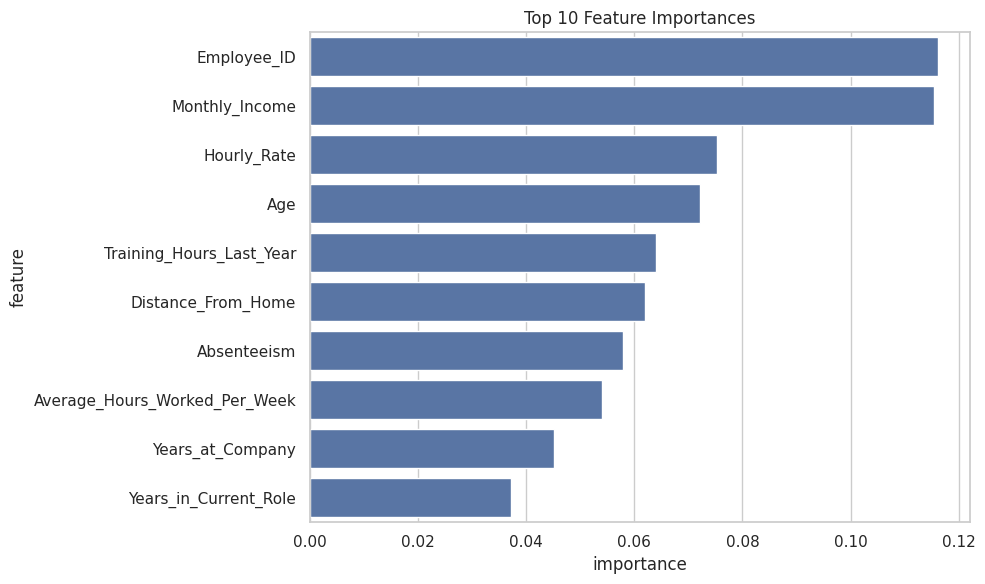

In [ ]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("employee_attrition_dataset_10000.csv")

# Encode target column
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

# Separate features and target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)

# Set MLflow tracking URI (change if using ngrok)
mlflow.set_tracking_uri("https://ac76-34-44-17-227.ngrok-free.app")

with mlflow.start_run():
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 5)
    mlflow.log_param("model_type", "RandomForest")
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(model, "model")


    # Log feature importances
    importances = model.feature_importances_
    feat_names = X_train.columns
    importance_df = pd.DataFrame({"feature": feat_names, "importance": importances}).sort_values(by="importance", ascending=False)
    importance_df.to_csv("feature_importance.csv", index=False)
    mlflow.log_artifact("feature_importance.csv")

    # Plot and log top 10 feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x="importance", y="feature", data=importance_df.head(10))
    plt.title("Top 10 Feature Importances")
    plt.tight_layout()
    plt.savefig("feature_importance_plot.png")
    mlflow.log_artifact("feature_importance_plot.png")

print(" Model trained, metrics and artifacts logged to MLflow.")


2025/05/13 20:43:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run gb_employee_attrition at: https://ac76-34-44-17-227.ngrok-free.app/#/experiments/572701535869889524/runs/2a3e14a79a454f63a36ba9394a041639
🧪 View experiment at: https://ac76-34-44-17-227.ngrok-free.app/#/experiments/572701535869889524
 Second model logged to MLflow.


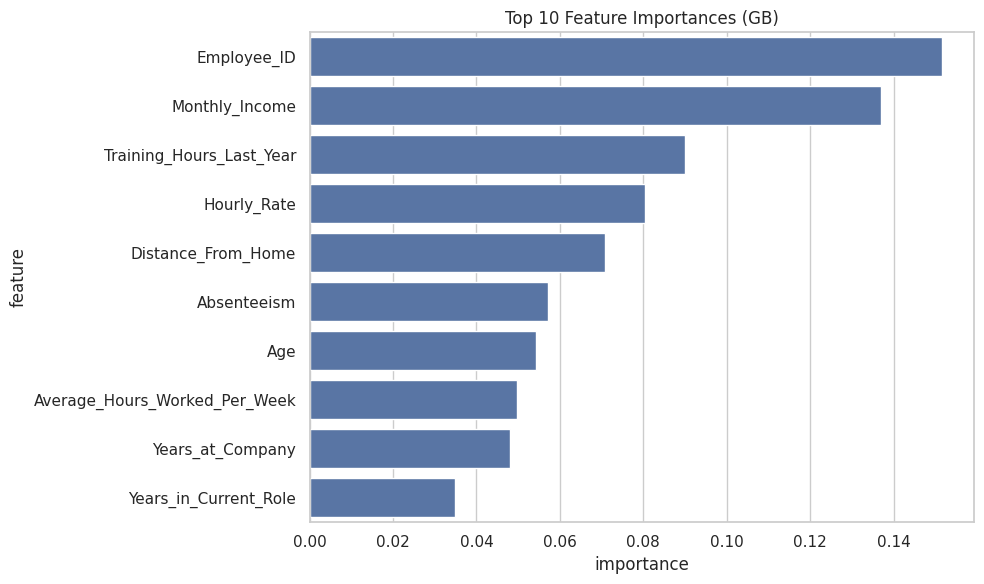

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a second model with different algorithm and parameters
model2 = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=4, random_state=42)
model2.fit(X_train, y_train)
preds2 = model2.predict(X_test)
acc2 = accuracy_score(y_test, preds2)

# Start another MLflow run
with mlflow.start_run(run_name="gb_employee_attrition"):
    mlflow.log_param("model_type", "GradientBoostingClassifier")
    mlflow.log_param("n_estimators", 150)
    mlflow.log_param("max_depth", 4)
    mlflow.log_param("learning_rate", 0.1)
    mlflow.log_metric("accuracy", acc2)
    mlflow.sklearn.log_model(model2, "model")

    # Log feature importances
    importances2 = model2.feature_importances_
    importance_df2 = pd.DataFrame({"feature": feat_names, "importance": importances2}).sort_values(by="importance", ascending=False)
    importance_df2.to_csv("feature_importance_gb.csv", index=False)
    mlflow.log_artifact("feature_importance_gb.csv")

    # Plot and log top 10 feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x="importance", y="feature", data=importance_df2.head(10))
    plt.title("Top 10 Feature Importances (GB)")
    plt.tight_layout()
    plt.savefig("feature_importance_plot_gb.png")
    mlflow.log_artifact("feature_importance_plot_gb.png")

print(" Second model logged to MLflow.")


In [ ]:
import mlflow

result = mlflow.register_model(
    model_uri="runs:/c859e4b157ff435dbc8159983f5e0a7a/model",
    name="EmployeeAttritionModel"
)

print("Model registered. Version:", result.version)


Registered model 'EmployeeAttritionModel' already exists. Creating a new version of this model...
2025/05/13 20:43:17 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: EmployeeAttritionModel, version 3


Model registered. Version: 3


Created version '3' of model 'EmployeeAttritionModel'.


In [ ]:
from mlflow.tracking import MlflowClient

client = MlflowClient()

# Transition to Staging
client.transition_model_version_stage(
    name="EmployeeAttritionModel",
    version=1,
    stage="Staging",
)

print(" Model moved to Staging.")


 Model moved to Staging.


<ipython-input-210-9a2c8e51400b>:6: FutureWarning:

``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages



In [ ]:
import joblib
joblib.dump(model, "model.pkl")


['model.pkl']

In [ ]:

from fastapi import FastAPI
from pydantic import BaseModel
import joblib

# Initialize FastAPI
app = FastAPI()

model = joblib.load("model.pkl")

# Define the input data model
class EmployeeData(BaseModel):
    age: int
    job_level: int
    monthly_income: float
    years_at_company: int
    overtime: int  # 1 for Yes, 0 for No

# Define the prediction endpoint
@app.post("/predict")
def predict(data: EmployeeData):
    input_data = [[
        data.age, data.job_level, data.monthly_income,
        data.years_at_company, data.overtime
    ]]
    prediction = model.predict(input_data)
    return {"attrition_risk": int(prediction[0])}


In [ ]:
%%writefile app.py
from fastapi import FastAPI
from pydantic import BaseModel
import joblib

app = FastAPI()
model = joblib.load("model.pkl")

class EmployeeData(BaseModel):
    age: int
    job_level: int
    monthly_income: float
    years_at_company: int
    overtime: int

@app.post("/predict")
def predict(data: EmployeeData):
    input_data = [[
        data.age, data.job_level, data.monthly_income,
        data.years_at_company, data.overtime
    ]]
    prediction = model.predict(input_data)
    return {"attrition_risk": int(prediction[0])}


Overwriting app.py
